In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

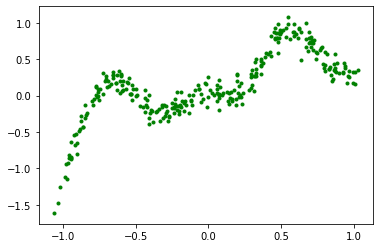

In [3]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
# xx = x.reshape(-1,1)
# yy = y.reshape(-1,1)
xx = np.c_[x,y]

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

## Doing SDT Linear Autoencoder (2 Pices)

In [91]:
optimizer = tnn.Adam()

sig = tnn.NonLinearLayer(2,1, activation=tnn.Sigmoid(), optimizer=optimizer)

le1 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld1 = tnn.LinearLayer(1, 2, optimizer=optimizer)

le2 = tnn.LinearLayer(2, 1, optimizer=optimizer)
ld2 = tnn.LinearLayer(1, 2, optimizer=optimizer)

In [92]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.show()

for step in range(100000):
    
    ###FORWARD
    sout = sig.forward(xx)
    
    h1 = le1.forward(xx)
    h2 = le2.forward(xx)

    yy1 = ld1.forward(h1)
    yy2 = ld2.forward(h2)
    
    yy = yy1*sout + yy2*(1-sout)
    dy = yy-xx
    
    ###BACKWARD
    
    dy1 = dy*sout
    dy2 = dy*(1-sout)
    
    dsout = np.mean(dy*(yy1-yy2), axis=1, keepdims=True)
    dx = sig.backward(dsout)
    
    ### Backpropagation
    loss = (dy**2).mean()
    
    dh1 = ld1.backward(dy1)
    dx1 = le1.backward(dh1)
    
    dh2 = ld2.backward(dy2)
    dx2 = le2.backward(dh2)
    
    sig.update()
    
    ld1.update()
    le1.update()
    
    ld2.update()
    le2.update()
    
    if step % 100 == 0:
        
        norm = np.linalg.norm(sig.weights)
        factor = np.exp(step/1000)/norm
        
        sig.weights = sig.weights * factor
        sig.bias = sig.bias*factor


        print('_______________________')
        print("epoch", step)
        print(f"Loss {loss} mag {norm}")

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.scatter(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.000025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.5457366829268551 mag 0.595918307819032

_______________________
epoch 100
Loss 0.02516163649818899 mag 0.6102930950611881

_______________________
epoch 200
Loss 0.009765364891358506 mag 0.8923450740614084

_______________________
epoch 300
Loss 0.005469775154214674 mag 1.0285755520748996

_______________________
epoch 400
Loss 0.00498832313625408 mag 1.0649280923550832

_______________________
epoch 500
Loss 0.00552257352840511 mag 1.2188037645175485

_______________________
epoch 600
Loss 0.005958644169085877 mag 1.4413962288833067

_______________________
epoch 700
Loss 0.005969668868866881 mag 1.6691206663988

_______________________
epoch 800
Loss 0.005925381609494118 mag 1.8743462721482664

_______________________
epoch 900
Loss 0.006062860341921001 mag 2.0748435038760373

_______________________
epoch 1000
Loss 0.006376238279390754 mag 2.3050893972120576

_______________________
epoch 1100
Loss 0.00676643854363132 mag 2.5678418067756317

__

/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/Manifold_Learning/mylibrary/nnlib.py:142: RuntimeWarning: overflow encountered in exp
  self.out = 1 / (1 + np.exp(-x))


_______________________
epoch 7100
Loss 0.02798218320420806 mag 1096.6332077734526

_______________________
epoch 7200
Loss 0.027972814320585855 mag 1211.9670913677733

_______________________
epoch 7300
Loss 0.027965054384523843 mag 1339.4307687823118

_______________________
epoch 7400
Loss 0.02797064080973877 mag 1480.2999280252661

_______________________
epoch 7500
Loss 0.027953317032195623 mag 1635.9844296024546

_______________________
epoch 7600
Loss 0.02794885062865911 mag 1808.0424141063118

_______________________
epoch 7700
Loss 0.027945073787037474 mag 1998.1958949195894

_______________________
epoch 7800
Loss 0.027941729707625776 mag 2208.3479918114185

_______________________
epoch 7900
Loss 0.027938768346074845 mag 2440.601977598729

_______________________
epoch 8000
Loss 0.027936076034264044 mag 2697.2823282611257

_______________________
epoch 8100
Loss 0.027933759025268193 mag 2980.957987039942

_______________________
epoch 8200
Loss 0.027931236566173568 mag 3294.


_______________________
epoch 16800
Loss 0.027890506522661163 mag 17894429.1195546

_______________________
epoch 16900
Loss 0.027890496469955426 mag 19776402.658497788

_______________________
epoch 17000
Loss 0.027890487165725966 mag 21856305.082325634

_______________________
epoch 17100
Loss 0.02789055355227358 mag 24154952.753575295

_______________________
epoch 17200
Loss 0.0278904706009578 mag 26695351.310742743

_______________________
epoch 17300
Loss 0.02789046324696838 mag 29502925.916445434

_______________________
epoch 17400
Loss 0.02789045645446708 mag 32605775.72099587

_______________________
epoch 17500
Loss 0.027890450183609743 mag 36034955.08814159

_______________________
epoch 17600
Loss 0.02789113990543002 mag 39824784.39757623

_______________________
epoch 17700
Loss 0.02789043909486292 mag 44013193.53483412

_______________________
epoch 17800
Loss 0.027890434139711373 mag 48642101.506333664

_______________________
epoch 17900
Loss 0.02789042960564571 mag 5


_______________________
epoch 26600
Loss 0.027892986778834648 mag 322703570371.1549

_______________________
epoch 26700
Loss 0.027890378982699544 mag 356642601133.379

_______________________
epoch 26800
Loss 0.027890378902908203 mag 394151030919.4627

_______________________
epoch 26900
Loss 0.02789037890161193 mag 435604256701.7262

_______________________
epoch 27000
Loss 0.027890378900432763 mag 481417156296.7058

_______________________
epoch 27100
Loss 0.027891366525403635 mag 532048240601.79865

_______________________
epoch 27200
Loss 0.027890378947643613 mag 588004242526.4237

_______________________
epoch 27300
Loss 0.027890378897491002 mag 649845188545.302

_______________________
epoch 27400
Loss 0.027890378896679398 mag 718190003631.6549

_______________________
epoch 27500
Loss 0.027890378895940843 mag 793722705666.3468

_______________________
epoch 27600
Loss 0.027891268002878243 mag 877199251318.7649

_______________________
epoch 27700
Loss 0.027890378952135593 mag 

TclError: invalid command name "pyimage491"

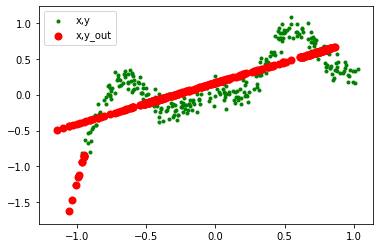

In [93]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
plt.legend()

In [94]:
w = sig.weights/np.linalg.norm(sig.weights)
b = sig.bias/np.linalg.norm(sig.weights)

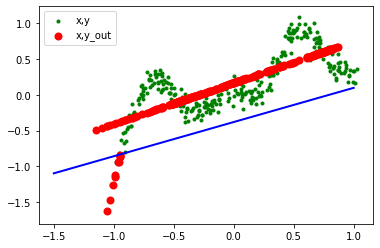

In [95]:
x1 = np.linspace(-1.5, 1, 200)
x2 = (-b-w[0,0]*x1)/w[1,0]
plt.plot(x1, x2, lw=2, c='b')
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(yy[:,0], yy[:,1], c='r', lw=2, label='x,y_out')
plt.legend()